In [1]:
import glob, json, h5py, math, time, os
import numpy as np
import matplotlib.pyplot as plt

from NPLM.PLOTutils import *
from NPLM.ANALYSISutils import *

In [2]:
# input directory
jobs_folder = '../your-path-to-the-experiments/'

# output directory
'''
# uncomment one of the following in order to continue
out_folder = './out_NP1/' # SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05
'''
out_folder = './out_NP0/' # BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15


In [3]:
json_file = '%s/config.json'%(out_folder)
with open(json_file, 'r') as jsonfile:
    config_json = json.load(jsonfile)
    
TAU_architecture    = config_json['BSMarchitecture']
TAU_df              = compute_df(input_size=TAU_architecture[0], hidden_layers=TAU_architecture[1:-1])
TAU_wc              = config_json['BSMweight_clipping']
TAU_patience        = config_json['patience_tau']
DELTA_patience      = config_json['patience_delta']
N_Bkg               = config_json['N_Bkg']
N_Sig               = config_json['N_Sig']

# 1. Collect jobs output in single summary files
(You can skip this section if using example files in './out_NP1/' or './out_NP0/')

### $\tau$ term

In [ ]:
values, files_id_tau, seeds_tau = collect_txt(DIR_IN=jobs_folder, suffix='TAU', files_prefix=[],  verbose=False)
save_txt_to_h5(values, files_id_tau, seeds_tau, suffix='tau', DIR_OUT=out_folder, FILE_NAME='')

In [ ]:
keys = ['loss', 'norm_0', 'shape_0']
for key in keys:
    key_history = collect_history(files_id_tau, DIR_IN=jobs_folder, suffix='TAU', key=key, verbose=False)
    save_history_to_h5(suffix='TAU', patience=TAU_patience, key_history, DIR_OUT=out_folder, FILE_NAME='', seeds=seeds_tau)

### $\Delta$ term

In [ ]:
values, files_id_delta, seeds_delta = collect_txt(DIR_IN=jobs_folder, suffix='DELTA', files_prefix=[],  verbose=False)
save_txt_to_h5(values, files_id_delta, seeds_delta, suffix='delta', DIR_OUT=out_folder, FILE_NAME='')

In [ ]:
keys = ['loss', 'norm_0', 'shape_0']
for key in keys:
    key_history = collect_history(files_id_delta, DIR_IN=jobs_folder, suffix='DELTA', key=key, verbose=False)
    save_history_to_h5(suffix='DELTA', patience=DELTA_patience, key_history, DIR_OUT=out_folder, FILE_NAME='', seeds=seeds_delta)

# ---------------------------------------------------------

# 2. Read summary files and analyse

### test statistic ($\tau$ and $\Delta$ terms)

###### values at the end of the training

In [4]:
tau,   tau_seeds   = Read_final_from_h5(DIR_IN=out_folder, FILE_NAME='TAU', suffix='_final')
delta, delta_seeds = Read_final_from_h5(DIR_IN=out_folder, FILE_NAME='DELTA', suffix='_final')

(100,)
(100,)


###### training history

In [5]:
tau_history        = Read_history_from_h5(DIR_IN=out_folder, FILE_NAME='TAU', suffix='_history')
delta_history      = Read_history_from_h5(DIR_IN=out_folder, FILE_NAME='DELTA', suffix='_history')

Output shape:
(100, 30)
Output shape:
(100, 2000)


### A. Plot of the empirical distribution of the $\tau$ term. 
All the collected experiments are considered.\
The distribution is compared with the target $\chi^2_{\rm df}$ distribution with number of degrees of freedom, $\rm df$, equal to the number of trainable parameters of the model.

###### BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15

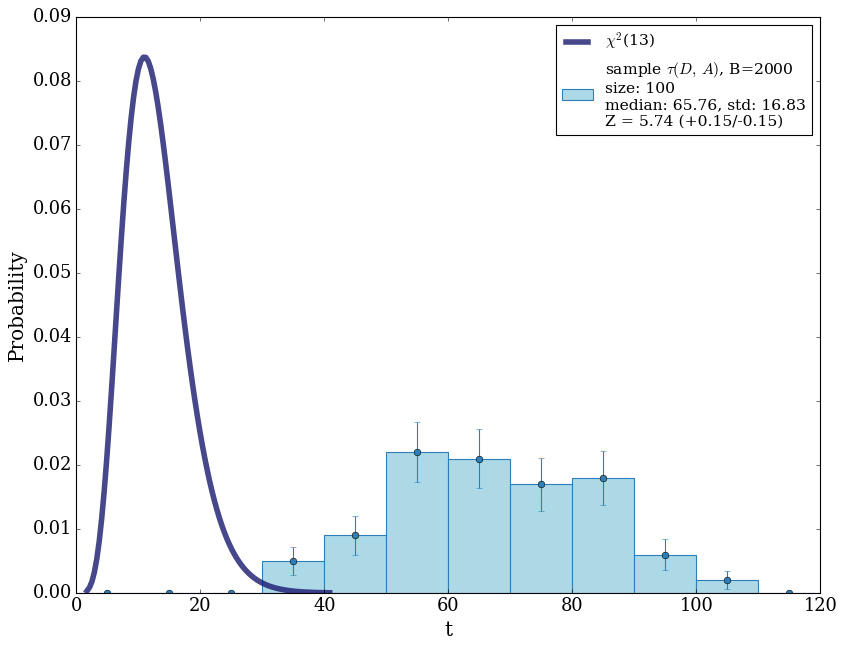

In [6]:
label = 'B=%i'%(N_Bkg)
if N_Sig: label += ', S=%i'%(N_Sig)
    
plot_1distribution(tau, df=TAU_df, xmin=0, xmax=120, nbins=12, label=r'$\tau(D,\,A)$, '+label, save=False, save_path='', file_name='')

###### SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05

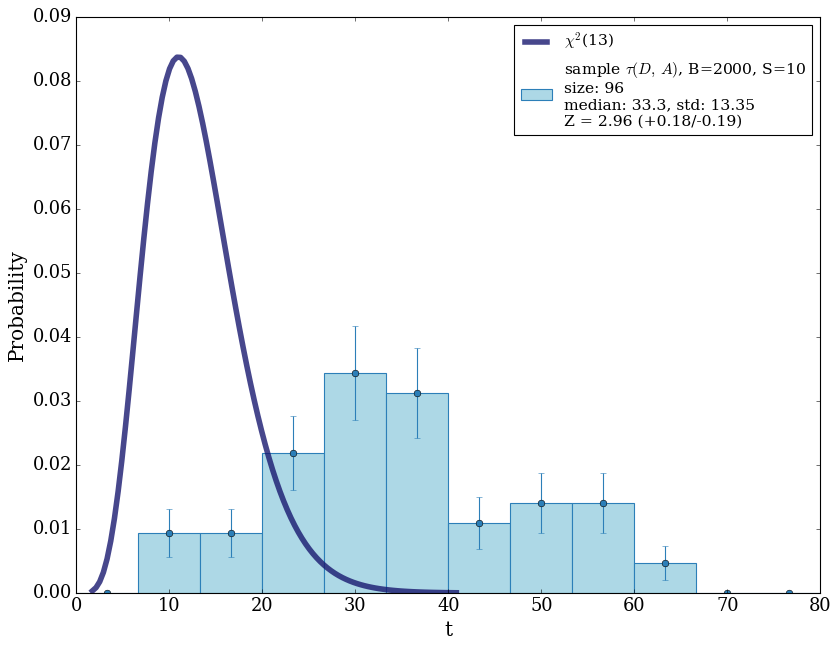

In [8]:
label = 'B=%i'%(N_Bkg)
if N_Sig: label += ', S=%i'%(N_Sig)
    
plot_1distribution(tau, df=TAU_df, xmin=0, xmax=80, nbins=12, label=r'$\tau(D,\,A)$, '+label, save=False, save_path='', file_name='')

### B. Plot describing the evolution of the empirical distribution of the $\tau$ term in the training time. 
All the collected experiments are considered.\
The some quantiles of the empirical distribution are calculated and their evolution is plotted against the number of training epochs (continue lines).\
The selected quantiles are compared with the ones obtained from the target $\chi^2_{\rm df}$ distribution with number of degrees of freedom, $\rm df$, equal to the number of trainable parameters of the model (dashed lines).

###### BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15

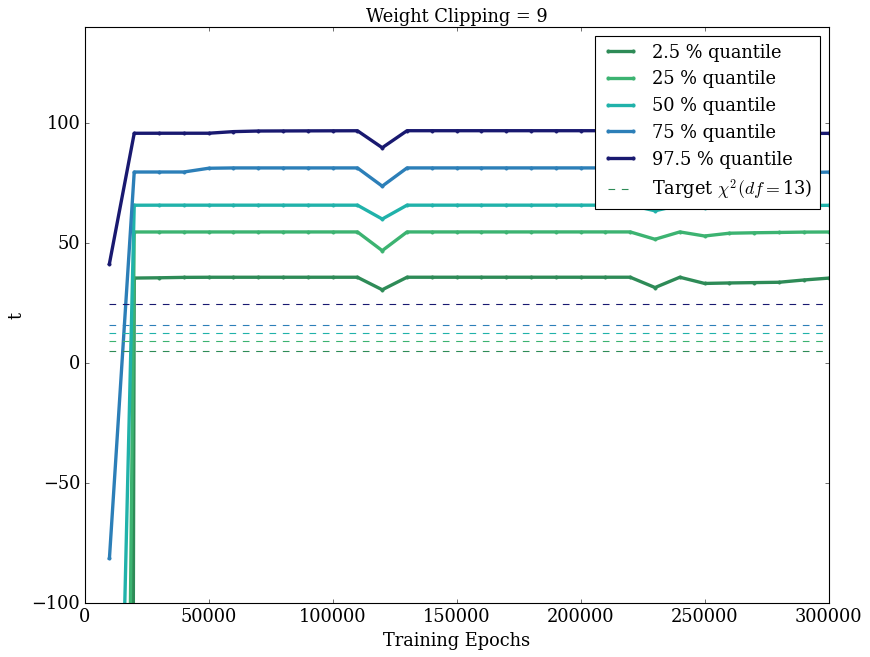

In [8]:
Plot_Percentiles_ref(tau_history, df=TAU_df, patience=TAU_patience,  wc=str(TAU_wc), ymax=140, ymin=-100, save=False, save_path='', file_name='')

###### SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05

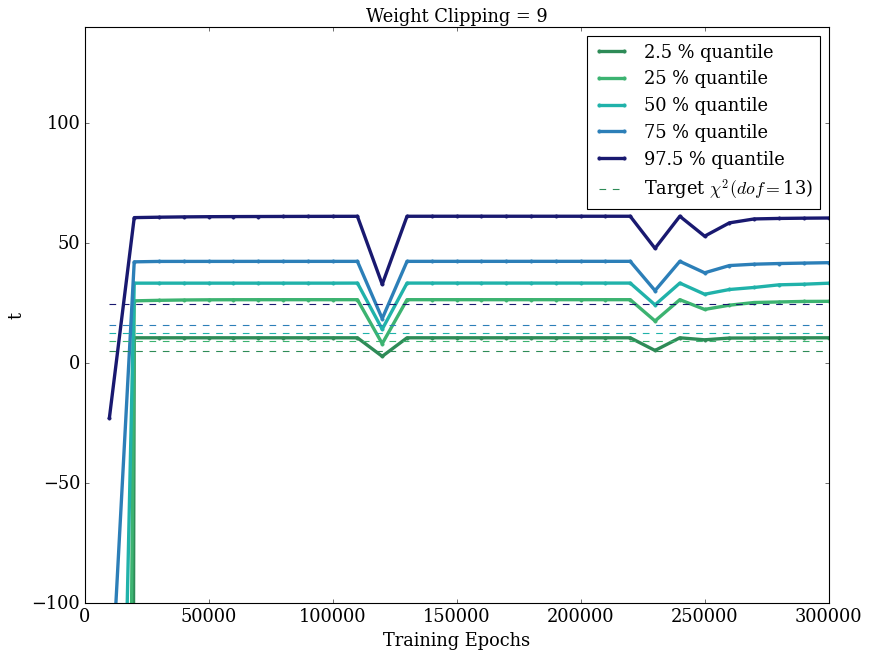

In [9]:
Plot_Percentiles_ref(tau_history, df=TAU_df, patience=TAU_patience,  wc=str(TAU_wc), ymax=140, ymin=-100, save=False, save_path='', file_name='')

### C. Plot of the empirical distributions of the $\tau$ and $\tau-\Delta$ terms. 
All the collected experiments are considered.\
The distribution are compared with the target $\chi^2_{\rm df}$ distribution with number of degrees of freedom, $\rm df$, equal to the number of trainable parameters of the model.

###### BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15

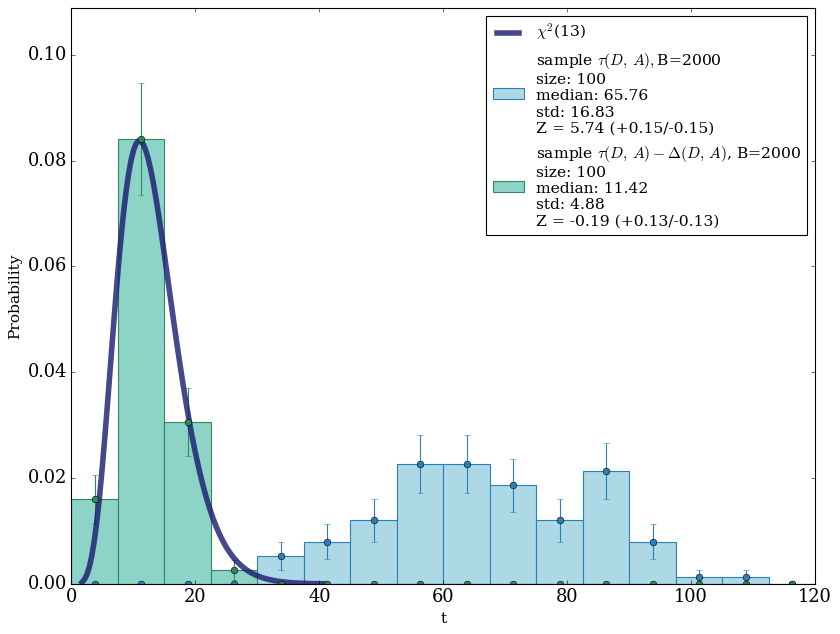

In [13]:
label = 'B=%i'%(N_Bkg)
if N_Sig: label += ', S=%i'%(N_Sig)

plot_2distribution(tau, tau-delta, df=TAU_df, xmin=0, xmax=120, nbins=16, 
                   label1=r'$\tau(D,\,A), $'+label, label2=r'$\tau(D,\,A)-\Delta(D,\,A)$, '+label,
                   save=False, save_path='', file_name='')

Kolmogorov-Smirnov test to access the degree of compatibility of the $\tau-\Delta$ empirical distribution with the target $\chi^2$

In [7]:
print('Kolmogorov-Smirnov test')
pval = KS_test(tau-delta, dof=TAU_df, Ntoys=100000)
print('p-value: %f'%(pval))

Kolmogorov-Smirnov test
p-value: 0.077914


###### SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05

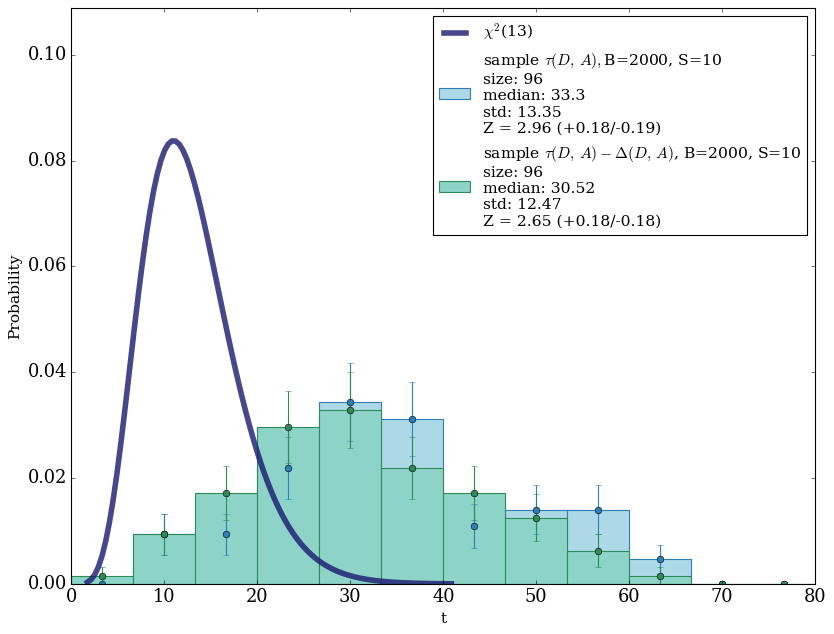

In [10]:
label = 'B=%i'%(N_Bkg)
if N_Sig: label += ', S=%i'%(N_Sig)

plot_2distribution(tau, tau-delta, df=TAU_df, xmin=0, xmax=80, nbins=12,  
                   label1=r'$\tau(D,\,A), $'+label, label2=r'$\tau(D,\,A)-\Delta(D,\,A)$, '+label,
                  save=False, save_path='', file_name='')

### D. Plot describing the evolution of the empirical distribution of the $\tau-\Delta_{\rm final}$ term in the training time. 
All the collected experiments are considered.\
The some quantiles of the empirical distribution are calculated and their evolution is plotted against the number of training epochs (continue lines).\
The selected quantiles are compared with the ones obtained from the target $\chi^2_{\rm df}$ distribution with number of degrees of freedom, $\rm df$, equal to the number of trainable parameters of the model (dashed lines).

###### BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15

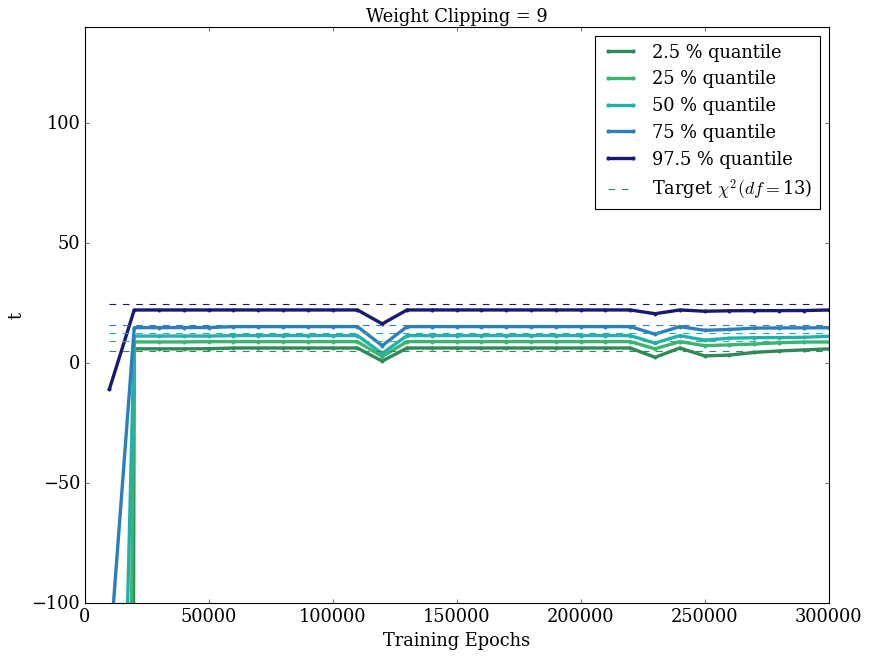

In [15]:
Plot_Percentiles_ref(tau_history-delta_history[:, -1:], df=TAU_df, patience=TAU_patience,  wc=str(TAU_wc), ymax=140, ymin=-100, save=False, save_path='', file_name='')

###### SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05

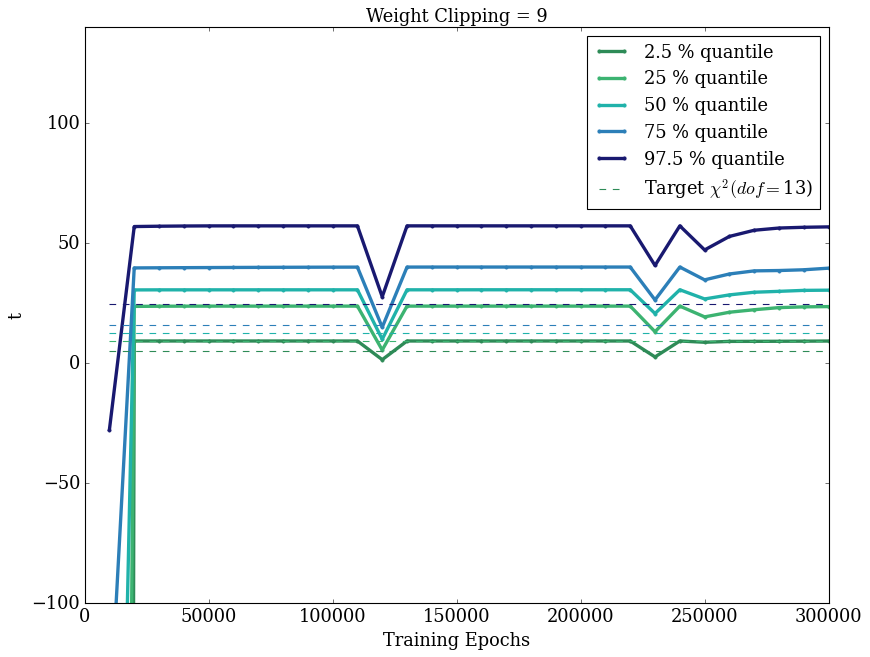

In [42]:
Plot_Percentiles_ref(tau_history-delta_history[:, -1:], df=TAU_df, patience=TAU_patience,  wc=str(TAU_wc), ymax=140, ymin=-100, save=False, save_path='', file_name='')

### E. Probability of discovery New Physics at different Z-score levels 

Being the $p$-value and the corresponding Z-score computed as\
$$p_{\rm obs} = P(t_{\rm obs}>t)_{\chi2_{\rm df}}$$
and\
$$Z_{\rm obs} = \Phi^{-1}[1- p_{\rm obs}], $$

We define $\rm{P}(\alpha)$ as theprobability of bserving a Z-score greater than $Z_{\alpha}$\
$$\rm{P}(\alpha) = P(Z>Z_{\alpha})$$

###### Example:

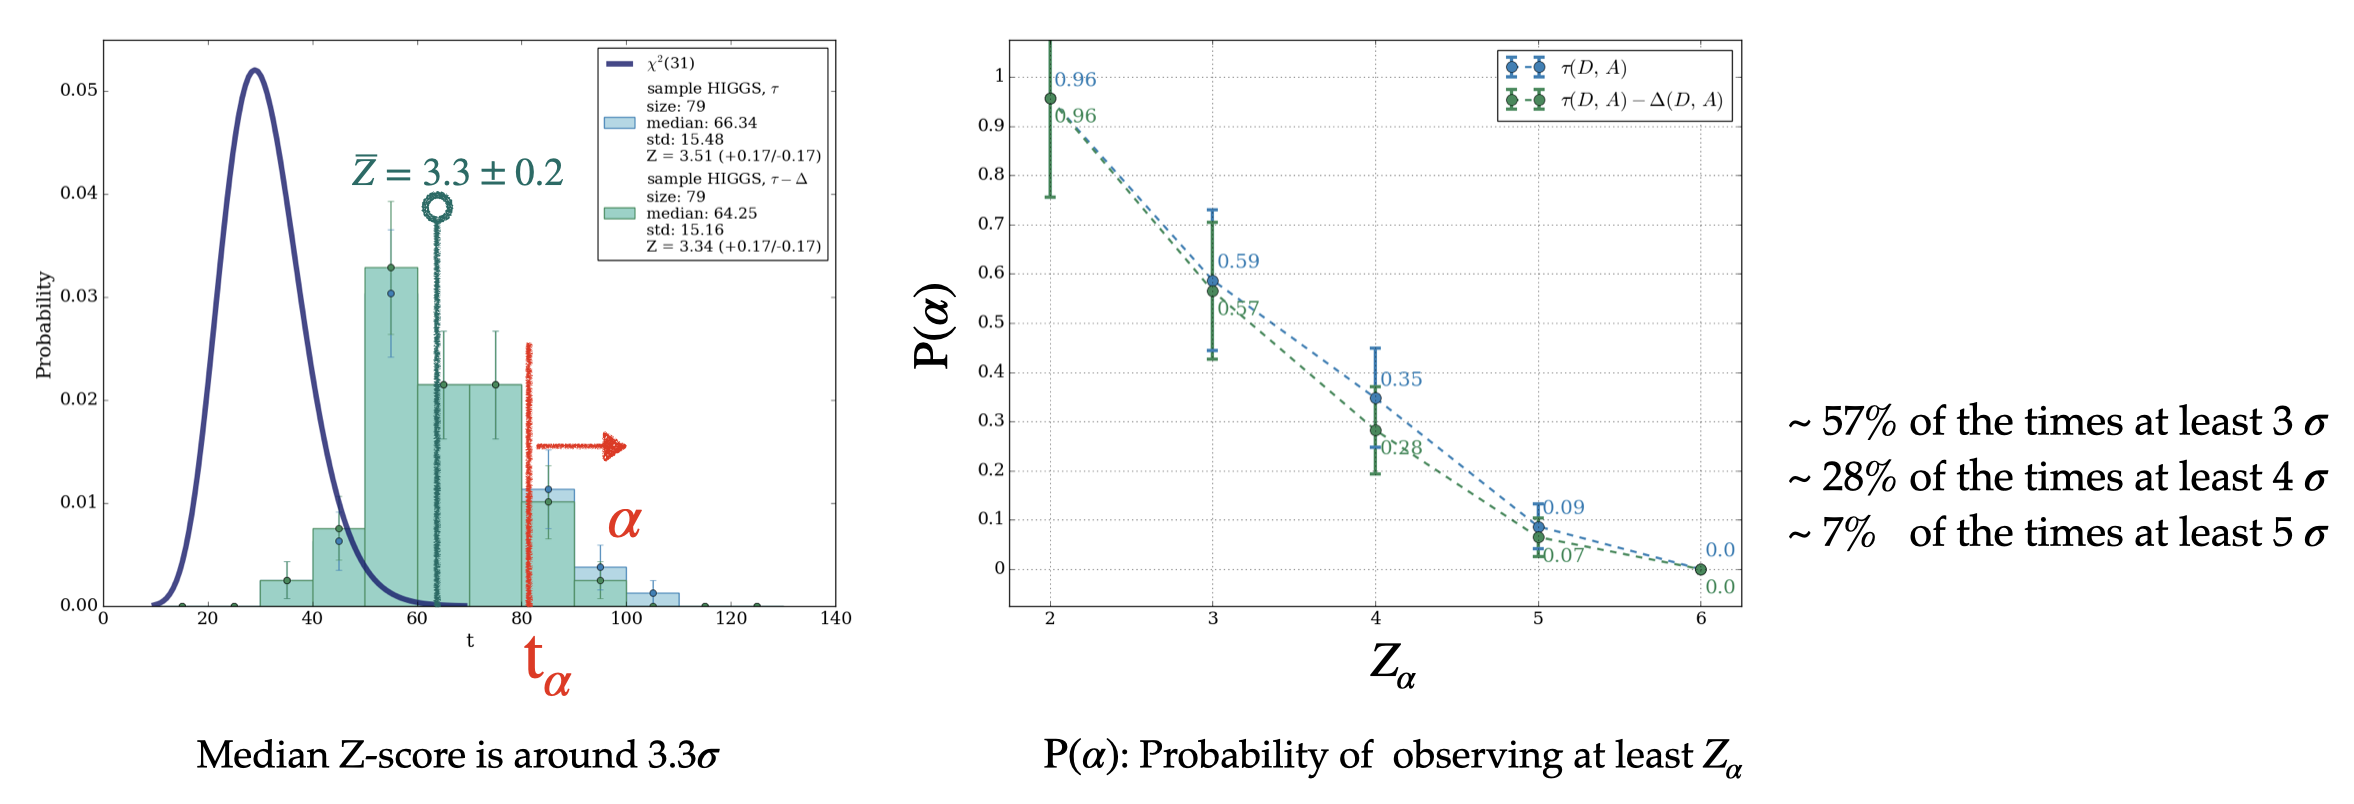

###### BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15

Here the $\tau$ term performances are due to the presence of a systematic effect of $\nu_N=+0.15$ in the data.\
Conversely the $\tau-\Delta$ term sees nothing as the systematic effect is correctly canceled out in the subtraction.

/eos/home-g/ggrosso/PhD/BSM/NPLM_package/1D_example/NPLM/PLOTutils.py:337: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(Zscore_star_list, y2, yerr=y2*np.sqrt((1.+1./y2)/t2.shape[0]), lw=1.5, ms=10, capsize=5, capthick=3, elinewidth=3, color='seagreen', ls='--', marker='o', label=label2)
/eos/home-g/ggrosso/PhD/BSM/NPLM_package/1D_example/NPLM/PLOTutils.py:337: RuntimeWarning: invalid value encountered in multiply
  plt.errorbar(Zscore_star_list, y2, yerr=y2*np.sqrt((1.+1./y2)/t2.shape[0]), lw=1.5, ms=10, capsize=5, capthick=3, elinewidth=3, color='seagreen', ls='--', marker='o', label=label2)


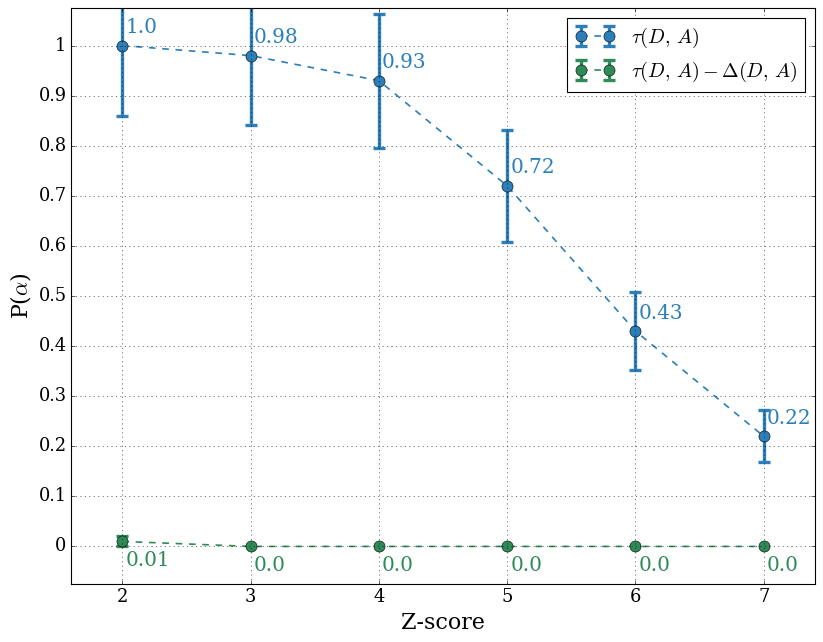

In [6]:
plot_alpha_scores(t1=tau, t2=tau-delta, df=TAU_df, label1=r'$\tau(D,\,A)$', label2=r'$\tau(D,\,A)-\Delta(D,\,A)$', 
                  Zscore_star_list=[2, 3, 4, 5, 6, 7], save=False, save_path='', file_name='')

###### SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05

The sensitivity to the New Physics source of of discrepancy is present at the $\tau$ level and mantained after correcting for systematic effects too.

/eos/home-g/ggrosso/PhD/BSM/NPLM_package/1D_example/NPLM/PLOTutils.py:376: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(Zscore_star_list, y2, yerr=y2*np.sqrt((1.+1./y2)/t1.shape[0]), lw=1.5, ms=10, capsize=5, capthick=3, elinewidth=3,
/eos/home-g/ggrosso/PhD/BSM/NPLM_package/1D_example/NPLM/PLOTutils.py:376: RuntimeWarning: invalid value encountered in multiply
  plt.errorbar(Zscore_star_list, y2, yerr=y2*np.sqrt((1.+1./y2)/t1.shape[0]), lw=1.5, ms=10, capsize=5, capthick=3, elinewidth=3,
/eos/home-g/ggrosso/PhD/BSM/NPLM_package/1D_example/NPLM/PLOTutils.py:382: RuntimeWarning: divide by zero encountered in true_divide
  plt.errorbar(Zscore_star_list, y2, yerr=y2*np.sqrt((1.+1./y2)/t2.shape[0]), lw=1.5, ms=10, capsize=5, capthick=3, elinewidth=3,
/eos/home-g/ggrosso/PhD/BSM/NPLM_package/1D_example/NPLM/PLOTutils.py:382: RuntimeWarning: invalid value encountered in multiply
  plt.errorbar(Zscore_star_list, y2, yerr=y2*np.sqrt((1.+1./y2)/t2.shape[0]), lw=1.5, 

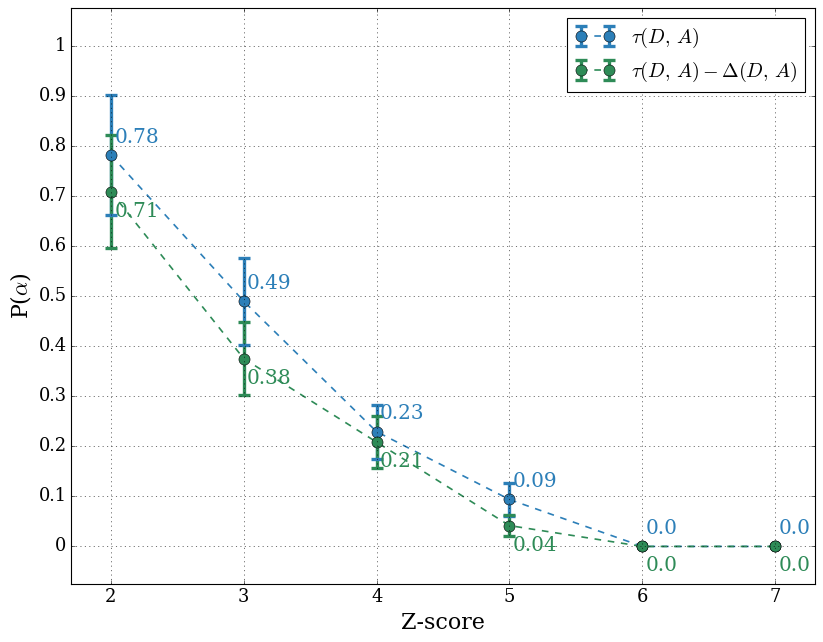

In [11]:
plot_alpha_scores(t1=tau, t2=tau-delta, df=TAU_df, label1=r'$\tau(D,\,A)$', label2=r'$\tau(D,\,A)-\Delta(D,\,A)$', 
                  Zscore_star_list=[2, 3, 4, 5, 6, 7], save=False, save_path='', file_name='')

### F. Plots describing the evolution of the empirical distribution of each nuisance parameter in the training time.
#### $\tau$ term

###### BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15

Output shape:
(100, 30)
(30, 5)


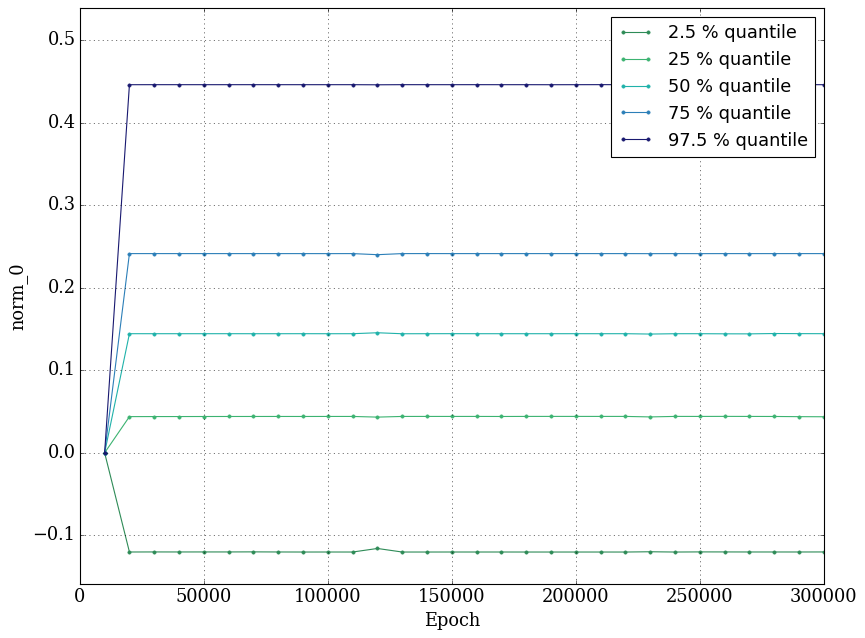

Output shape:
(100, 30)
(30, 5)


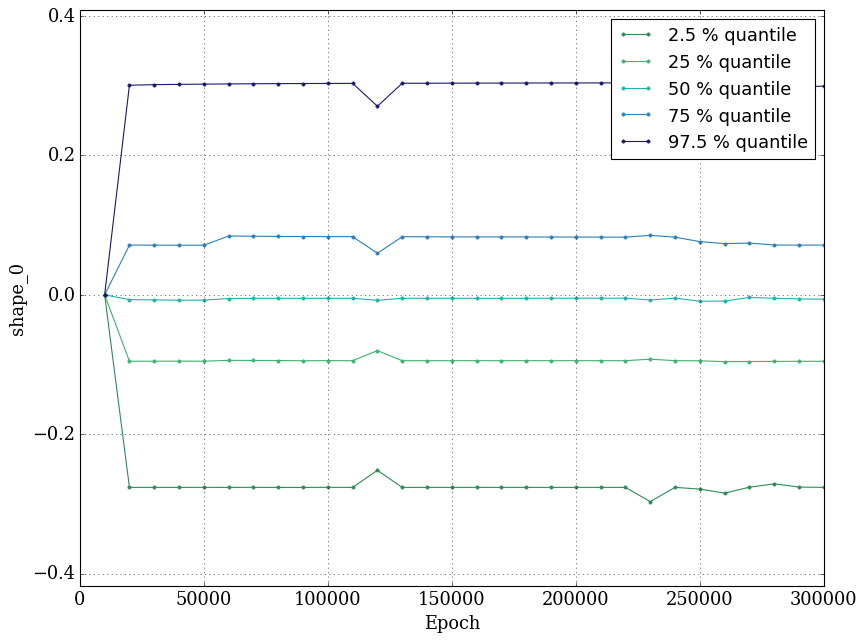

In [7]:
keys = ['norm_0', 'shape_0'
       ]
for key in keys:
    nu = Read_history_from_h5(DIR_IN=out_folder, FILE_NAME='TAU', suffix='_%s_history'%(key))
    Plot_Percentiles(nu, patience=TAU_patience,  ylabel=key, ymax=np.max(nu), ymin=np.min(nu), save=False, save_path='', file_name='')

###### SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05

Output shape:
(96, 30)
(30, 5)


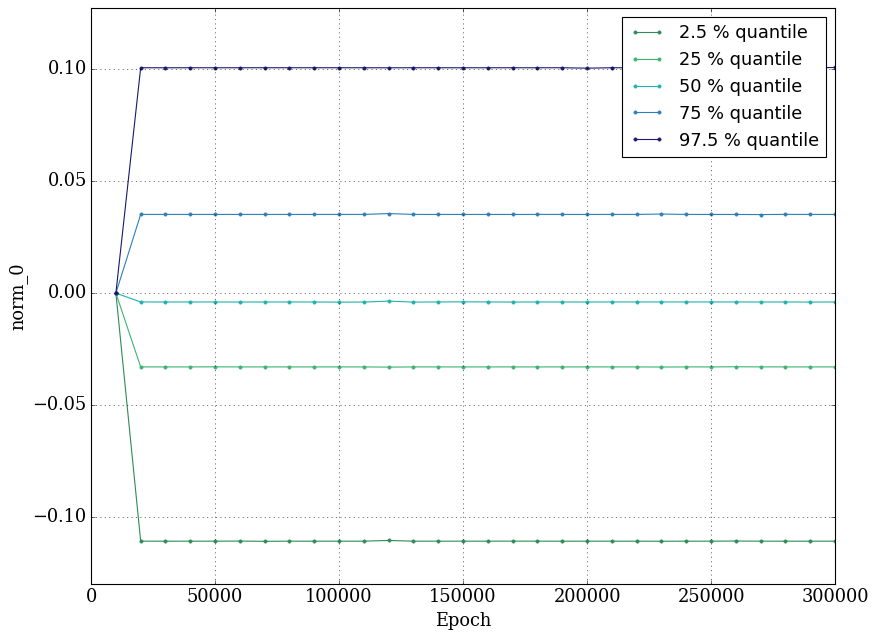

Output shape:
(96, 30)
(30, 5)


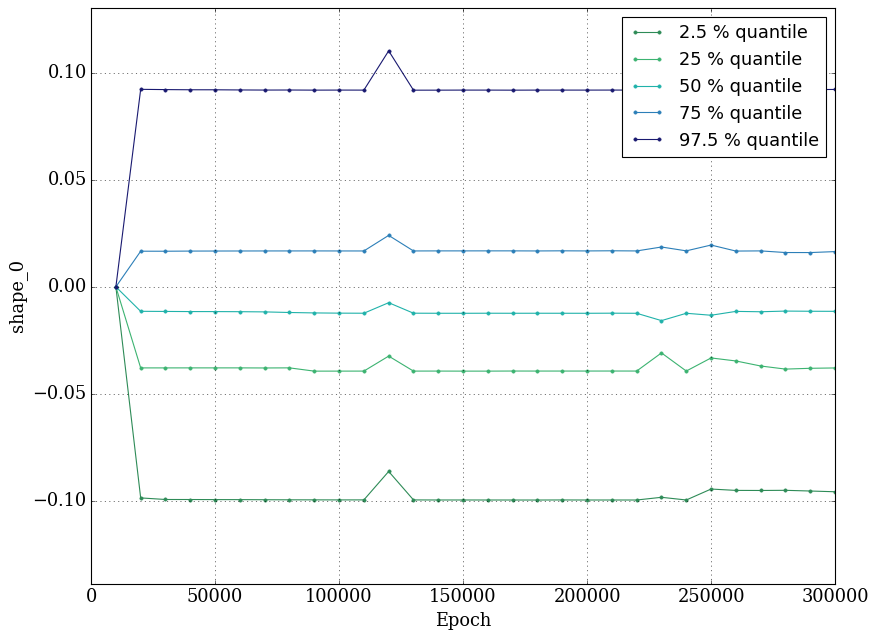

In [36]:
keys = ['norm_0', 'shape_0'
       ]
for key in keys:
    nu = Read_history_from_h5(DIR_IN=out_folder, FILE_NAME='TAU', suffix='_%s_history'%(key))
    Plot_Percentiles(nu, patience=TAU_patience,  ylabel=key, ymax=np.max(nu), ymin=np.min(nu), save=False, save_path='', file_name='')

#### $\Delta$ term

###### BKG-only experiments NU_S=0, NU_N=0.15, SIGMA_S=SIGMA_N=0.15

Output shape:
(100, 2000)
(2000,)
(2000, 5)


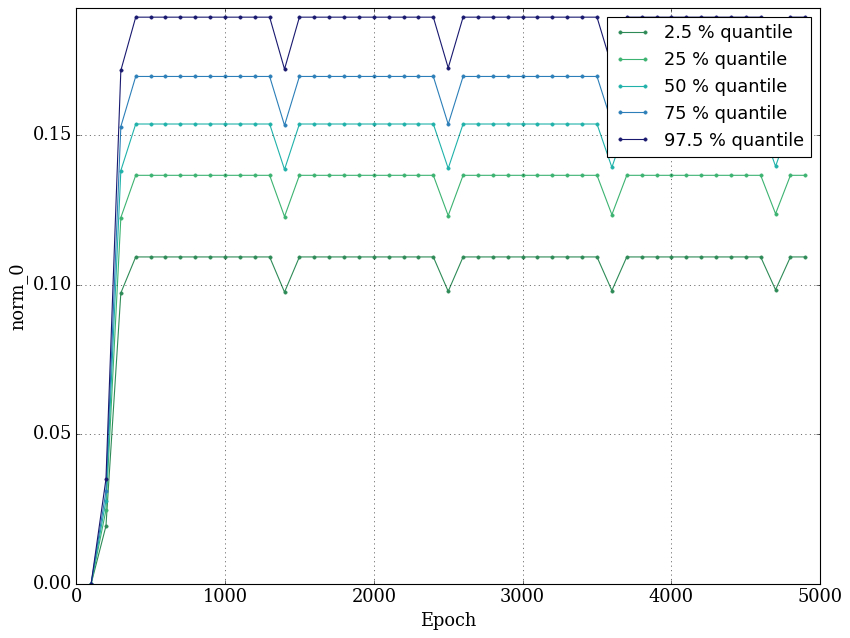

Output shape:
(100, 2000)
(2000,)
(2000, 5)


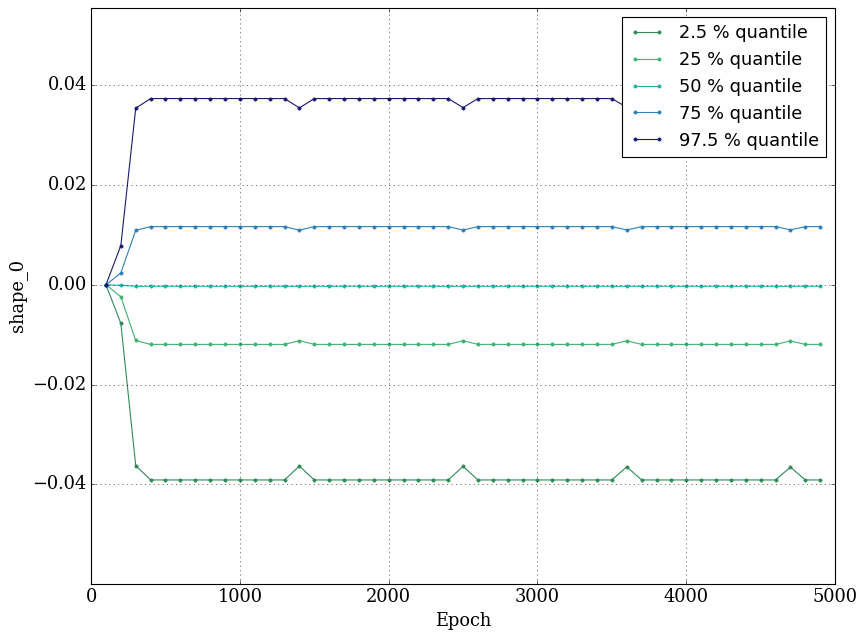

In [34]:
keys = ['norm_0', 'shape_0'
       ]
for key in keys:
    nu = Read_history_from_h5(DIR_IN=out_folder, FILE_NAME='DELTA', suffix='_%s_history'%(key))
    Plot_Percentiles(nu, patience=DELTA_patience,  ylabel=key, ymax=np.max(nu), ymin=np.min(nu), checkpoints=np.arange(0, 50)*100, save=False, save_path='', file_name='')

###### SIG+BKG experiments  NU_S=0, NU_N=0,    SIGMA_S=SIGMA_N=0.05

Output shape:
(96, 2000)
(2000,)
(2000, 5)


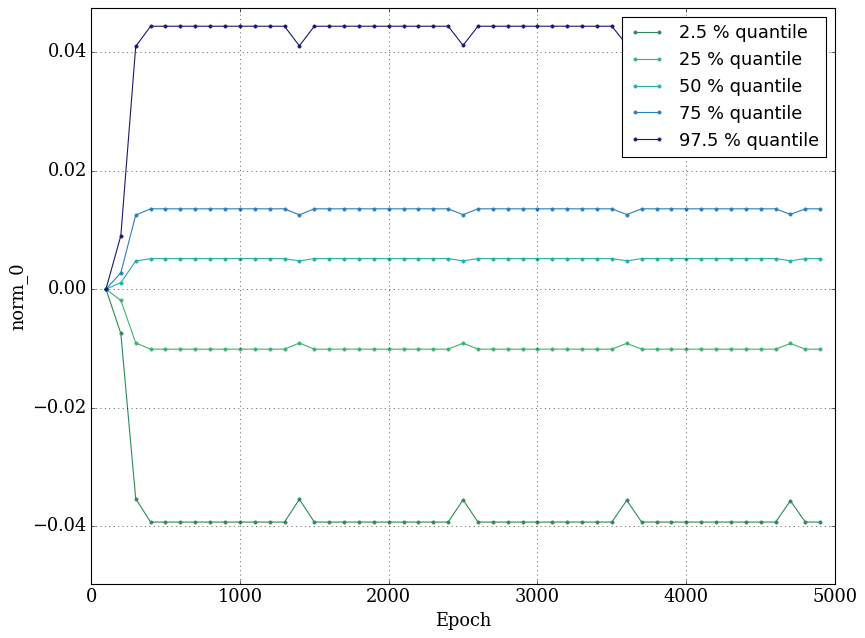

Output shape:
(96, 2000)
(2000,)
(2000, 5)


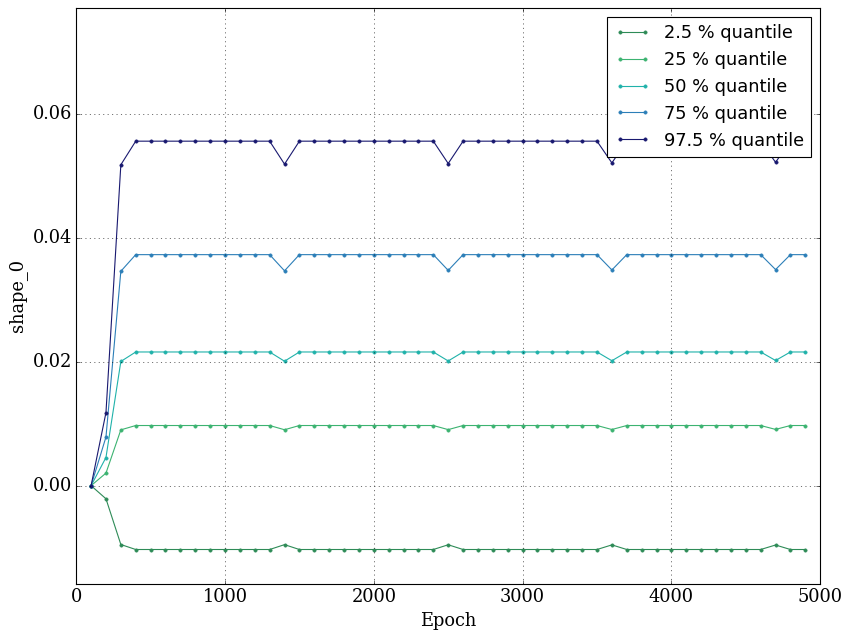

In [15]:
keys = ['norm_0', 'shape_0'
       ]
for key in keys:
    nu = Read_history_from_h5(DIR_IN=out_folder, FILE_NAME='DELTA', suffix='_%s_history'%(key))
    Plot_Percentiles(nu, patience=DELTA_patience,  ylabel=key, ymax=np.max(nu), ymin=np.min(nu), checkpoints=np.arange(0, 50)*100, save_path='', file_name='')